## Some Libraries that we will need  

In [1]:
# For preprocessing: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For trying many technickes to choose the best of them:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

## First look of the data 

In [2]:
df = pd.read_csv("D:/Mzakra/Datasets/smartphones.csv")
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [3]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 980 observations and 22 features in this dataset. 



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

* There is some Null values that we need to deal with.
* All the data types seem alright.

In [5]:
df.describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


* The data need to scale to make the model make better predictions.
* There is some outliers we need to deal with.
* There is value = 0 in the "primary_camera_front" column that i don't think it's right.

In [6]:
for i in list(df.columns):
    
    print("\n ************ "+i+" ************\n")
    print("\n",df[i].value_counts())
    print("\n",df[i].describe(),"\n")


 ************ brand_name ************


 xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
honor         13
nokia         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
redmi          3
gionee         3
letv           3
lg             3
micromax       3
oukitel        3
ikall          3
royole         2
lyf            2
lenovo         2
doogee         2
zte            2
leitz          1
leeco          1
duoqin         1
sharp          1
cola           1
tcl            1
cat            1
tesla          1
vertu          1
blu            1
blackview      1
Name: brand_name, dtype: int64

 count        980
unique        46
top       xiaomi
freq         134
Name: brand_name, dtype: object 


 ************ model ************


 Appl

In [7]:
for i in list(df.columns):
    
    print("\n ************ "+i+" ************\n")
    print("\n",df[i].value_counts())
    print("\n",df[i].describe(),"\n")


 ************ brand_name ************


 xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
honor         13
nokia         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
redmi          3
gionee         3
letv           3
lg             3
micromax       3
oukitel        3
ikall          3
royole         2
lyf            2
lenovo         2
doogee         2
zte            2
leitz          1
leeco          1
duoqin         1
sharp          1
cola           1
tcl            1
cat            1
tesla          1
vertu          1
blu            1
blackview      1
Name: brand_name, dtype: int64

 count        980
unique        46
top       xiaomi
freq         134
Name: brand_name, dtype: object 


 ************ model ************


 Appl

**Observations:**
* In "price" column there is some records that over 150k that we will drop from the data.
* In "battery_capacity" column there is a value over 7k that I don't think it's correct.
* In "refresh_rate" column there is a value = 240, Like man my pc moniter is lower than that😂.
* We will correct the 0 value in "primary_camera_front" column.

## Data Cleaning

In [8]:
# Droping the records that over 150k in "price" column

df.drop(df.index[df['price'] > 150000], inplace = True)

In [9]:
# Droping the wrong value in "battery_capacity" column

df.drop(df.index[df["battery_capacity"] > 7000], inplace = True)

In [10]:
# Droping the wrong value in "refresh_rate" column

df.drop(df.index[df["refresh_rate"] > 200], inplace = True)

In [11]:
# Droping the wrong value in "primary_camera_front" column

df.drop(df.index[df["primary_camera_front"] == 0], inplace = True)

### Mising values 

In [12]:
df.isna().sum()

brand_name                     0
model                          0
price                          0
avg_rating                    95
5G_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               39
battery_capacity              11
fast_charging_available        0
fast_charging                202
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            11
primary_camera_rear            0
primary_camera_front           2
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

## Filling the missing values with the mode  

In [13]:
df["processor_brand"].fillna(value = "Not Defiend",inplace = True)
for i in list(df.columns):
    df[i]=df[i].fillna(df[i].mode()[0])

In [14]:
df.isna().sum()

brand_name                   0
model                        0
price                        0
avg_rating                   0
5G_or_not                    0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_height            0
resolution_width             0
dtype: int64

### Checking for the duplicates 

In [15]:
df.duplicated().sum()

0

# Visualisation & Insights

In [16]:
# Number of unique brands
df["brand_name"].nunique()

43

In [17]:
# Top 5 brands in the data
df["brand_name"].unique()[:5]

array(['apple', 'asus', 'blackview', 'blu', 'cat'], dtype=object)

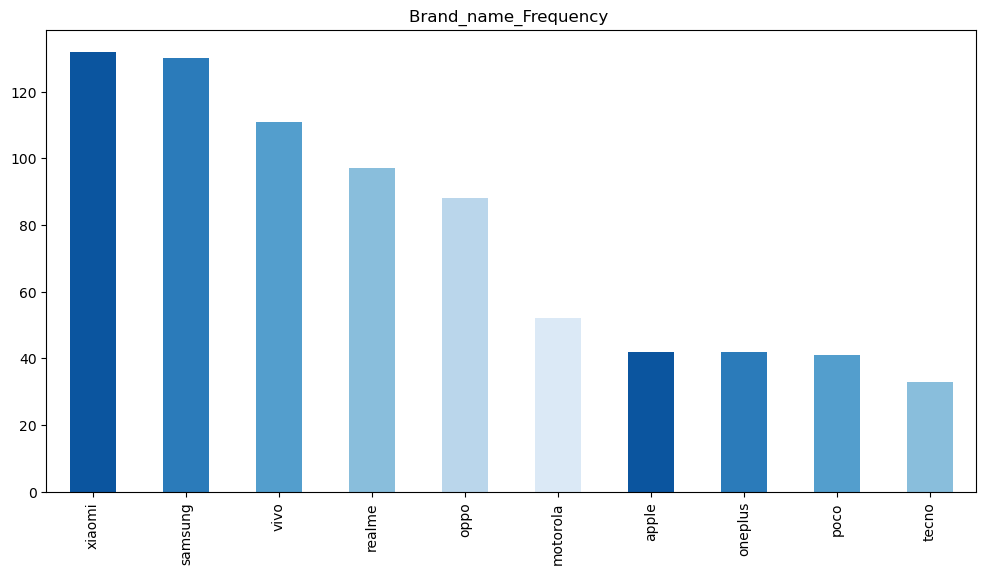

In [18]:
brand_name_counts = df['brand_name'].value_counts()
brand_name_counts[:10].plot(kind = 'bar', color = sns.color_palette("Blues_r"), title = "Brand_name_Frequency ", figsize = (12,6));

**▶️Xiaomi and Samsung is the most frequent in the data**

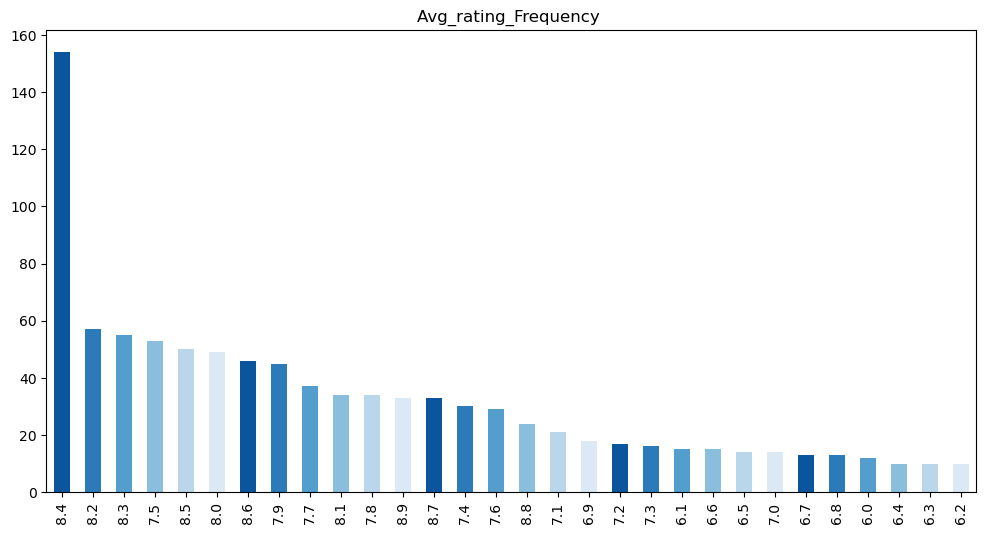

In [19]:
avg_rating_counts = df['avg_rating'].value_counts()
avg_rating_counts.plot(kind = 'bar', color = sns.color_palette("Blues_r"), title = "Avg_rating_Frequency ", figsize = (12,6));

**▶️The Avg_rating is very high**

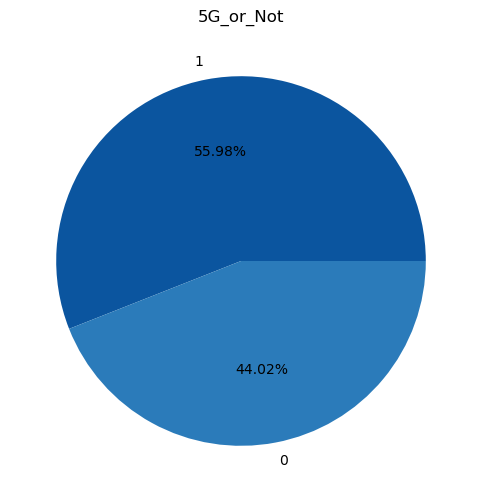

In [20]:
plt.figure(figsize = (12, 6))
_5G_or_not_df = (df['5G_or_not'].value_counts(normalize = True)).sort_values(ascending = False).to_frame()
plt.pie(_5G_or_not_df['5G_or_not'], labels = _5G_or_not_df.index, colors = sns.color_palette("Blues_r")
       ,autopct = '%0.2f%%');
plt.title("5G_or_Not");

**▶️More than half of the phones is 5G**

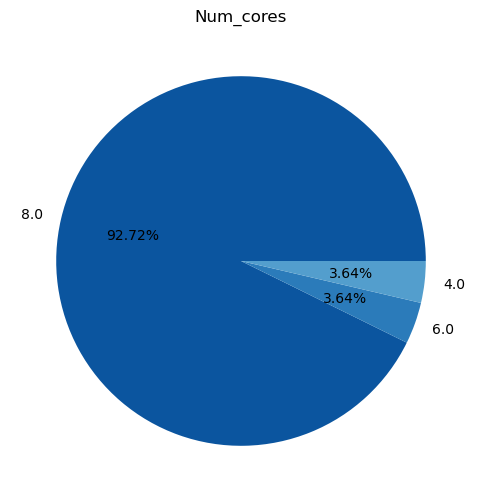

In [21]:
plt.figure(figsize = (12, 6))
num_cores_df = (df['num_cores'].value_counts(normalize = True)).sort_values(ascending = False).to_frame()
plt.pie(num_cores_df['num_cores'], labels = num_cores_df.index, colors = sns.color_palette("Blues_r")
       ,autopct = '%0.2f%%');
plt.title("Num_cores");

**▶️Almost all the phones is 8 cores**

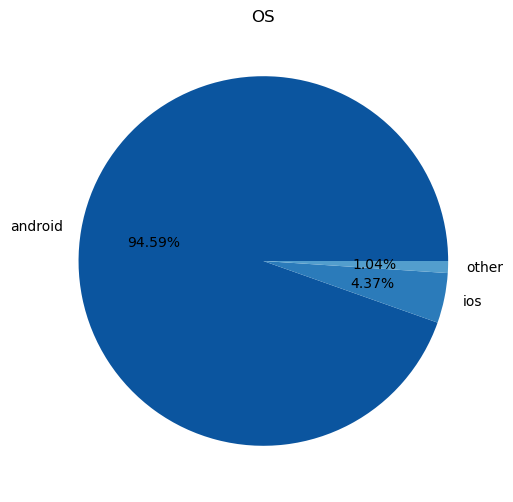

In [22]:
plt.figure(figsize = (12, 6))
os_df = (df['os'].value_counts(normalize = True)).sort_values(ascending = False).to_frame()
plt.pie(os_df['os'], labels = os_df.index, colors = sns.color_palette("Blues_r")
       ,autopct = '%0.2f%%');
plt.title("OS");

**▶️Almost all the phones is android**

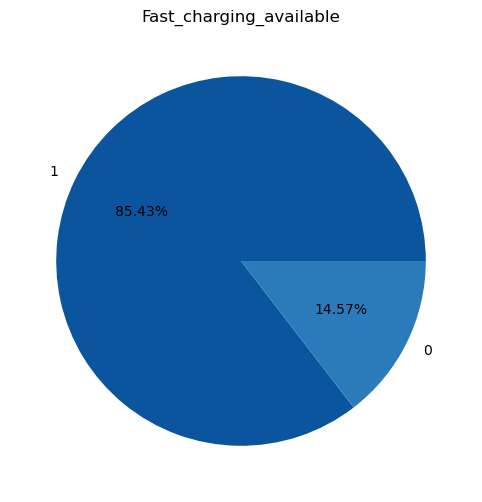

In [23]:
plt.figure(figsize = (12, 6))
fast_charging_available_df = (df['fast_charging_available'].value_counts(normalize = True)).sort_values(ascending = False).to_frame()
plt.pie(fast_charging_available_df['fast_charging_available'], labels = fast_charging_available_df.index, colors = sns.color_palette("Blues_r")
       ,autopct = '%0.2f%%');
plt.title("Fast_charging_available");

**▶️More than 3/4 the of phones has fast_charging**

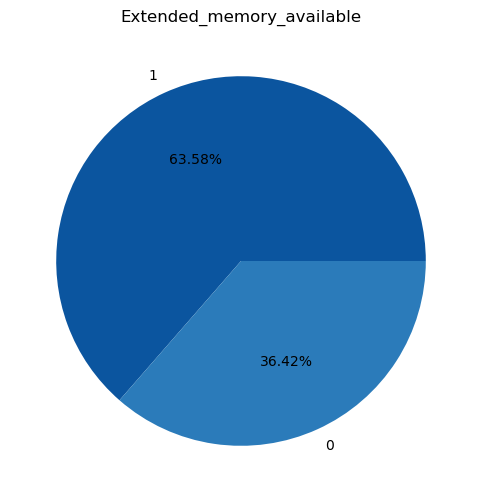

In [24]:
plt.figure(figsize = (12, 6))
extended_memory_available_df = (df['extended_memory_available'].value_counts(normalize = True)).sort_values(ascending = False).to_frame()
plt.pie(extended_memory_available_df['extended_memory_available'], labels = extended_memory_available_df.index, colors = sns.color_palette("Blues_r")
       ,autopct = '%0.2f%%');
plt.title("Extended_memory_available");

**▶️It's almost 2/3 of the phones has extended_memory**

### *You can make more and more Visualisation, The data is a good source for data Visualisation*

## Final Preprocessing Steps 

In [25]:
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,5000.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,5000.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


### First remove the column we won't need it in training. 

* We will drop "model" column because the column contain alot of unique values and dont's give much info

In [26]:
df.drop(["model"],axis=1,inplace=True)

### Scaling the numerical column 

In [27]:
def scale_column(data, column_name):
    scaler = StandardScaler()
    column_to_scale = data[column_name]
    column_to_scale = column_to_scale.values.reshape(-1, 1)
    scaled_data = scaler.fit_transform(column_to_scale)
    data[column_name] = scaled_data
    
columns_to_scale = df.drop(columns =["brand_name","processor_brand","os","price"])
for column in columns_to_scale:
    scale_column(df, column)

### Encodeing the string values 

In [28]:
cat_col=[col for col in df.columns
    if df[col].dtype == 'object']

df = pd.get_dummies(df,columns=cat_col,sparse=False)

In [29]:
# Feature Extraction
X = df.drop(columns ="price")
y = df["price"]

In [30]:
# Getting the shape of X and y
print(X.shape)
print(y.shape)

(961, 77)
(961,)


In [31]:
# Spliting the data into training and testing data with 80,20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
# Printing the shape of our training and testing data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (768, 77)
y_train shape: (768,)
X_test shape: (193, 77)
y_test shape: (193,)


**Some points will help choose the model:**
* Our data is labeled (price) so we will use Supervised Learning model.
* Our label has num values so we will use Regression model.

In [33]:
model = RandomForestRegressor(max_depth = 50,
                                max_features =  'sqrt',
                                min_samples_leaf = 1,
                                min_samples_split = 2,
                                bootstrap= False,
                                max_leaf_nodes=200,
                                n_estimators = 150,
                                random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      max_leaf_nodes=200, n_estimators=150, random_state=42)

In [34]:
# Getting the score of train and test data
print("Training Accuracy:" , round(model.score(X_train, y_train),2),"%")
print("Testing Accuracy:" , round(model.score(X_test, y_test),2),"%")

Training Accuracy: 0.99 %
Testing Accuracy: 0.9 %
